In [1]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import regularizers
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
cd D:\UC Davis MS\Courses\Computer and Info Sec\Course Project

D:\UC Davis MS\Courses\Computer and Info Sec\Course Project


In [99]:
# monday = pd.read_csv('Monday-WorkingHours.pcap_ISCX.csv')

In [100]:
# monday.head()

In [101]:
# unique_values = monday[' Label'].unique()

# print(unique_values)

In [102]:
# tuesday = pd.read_csv('Tuesday-WorkingHours.pcap_ISCX.csv')

In [103]:
# tuesday.head()

In [104]:
# unique_values = tuesday[' Label'].unique()

# print(unique_values)

In [105]:
# tuesday[' Label'].value_counts()

In [106]:
# wednesday = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')

In [107]:
# wednesday.head()

In [108]:
# unique_values = wednesday[' Label'].unique()

# print(unique_values)

In [109]:
# wednesday[' Label'].value_counts()

In [110]:
# thursday1=pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

In [111]:
# thursday1.head()

In [112]:
# unique_values = thursday1[' Label'].unique()

# print(unique_values)

In [113]:
# thursday1[' Label'].value_counts()

In [114]:
# thursday2 = pd.read_csv('Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')

In [115]:
# thursday2.head()

In [116]:
# unique_values = thursday2[' Label'].unique()

# print(unique_values)

In [117]:
# thursday2[' Label'].value_counts()

In [118]:
# friday1 = pd.read_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv')

In [119]:
# friday1.head()

In [120]:
# unique_values = friday1[' Label'].unique()

# print(unique_values)

In [121]:
# friday1[' Label'].value_counts()

In [122]:
# friday2=pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [123]:
# friday2.head()

In [124]:
# unique_values = friday2[' Label'].unique()

# print(unique_values)

In [125]:
# friday2[' Label'].value_counts()

In [30]:
friday3 = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')

In [31]:
friday3.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [32]:
unique_values = friday3[' Label'].unique()

print(unique_values)

['BENIGN' 'PortScan']


In [33]:
friday3[' Label'].value_counts()

 Label
PortScan    158930
BENIGN      127537
Name: count, dtype: int64

In [34]:
# data = pd.concat([monday, tuesday, wednesday, thursday1, thursday2, friday1, friday2, friday3])

data = friday3

C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


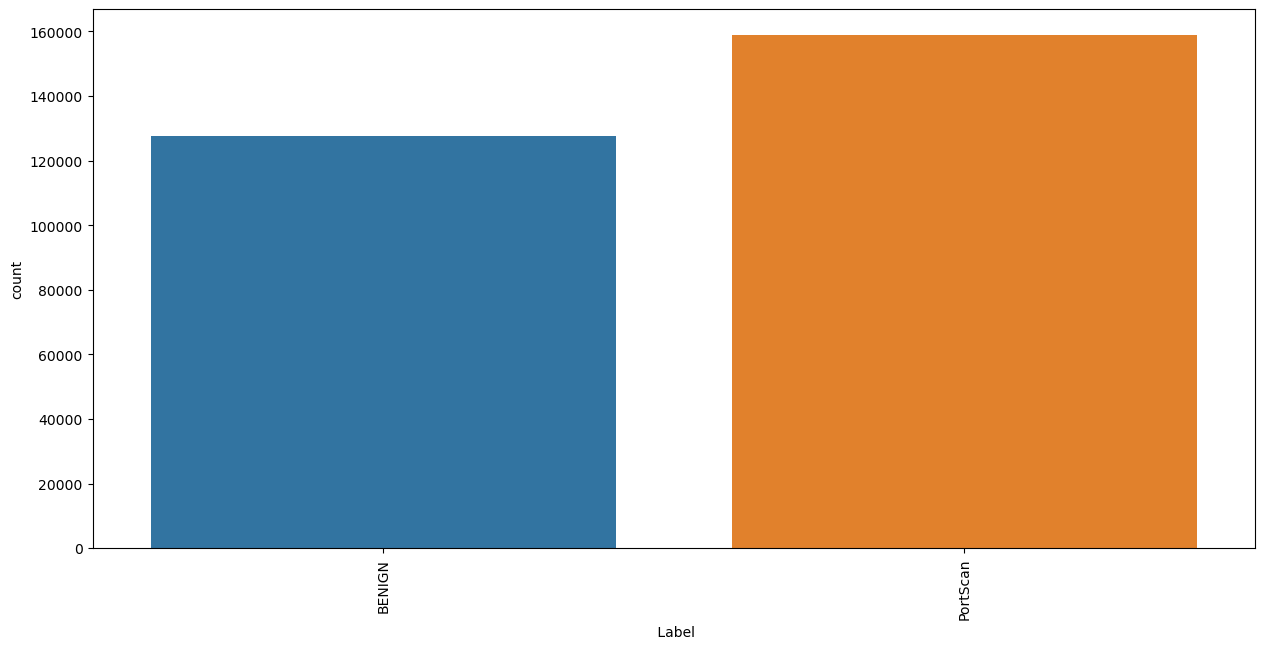

In [35]:
plt.figure(figsize=(15, 7))
sns.countplot(x=' Label', data=data)
plt.xticks(rotation=90)  # Rotating the x-axis labels to be vertical
plt.show()

In [36]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [37]:
data.shape

(286467, 79)

In [38]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,286467.000000,2.864670e+05,286467.000000,286467.000000,286467.000000,2.864670e+05,286467.000000,286467.000000,286467.000000,286467.000000,...,286467.000000,286467.000000,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05
mean,8044.876324,5.379331e+06,3.473283,3.520500,233.407667,2.707247e+03,81.033369,10.352013,24.138688,24.590994,...,1.728618,29.075328,3.409213e+04,2.294987e+04,7.785722e+04,2.171380e+04,1.602973e+06,6.120390e+04,1.647188e+06,1.536286e+06
std,15378.583442,2.192364e+07,19.515131,28.288916,1865.523600,5.097783e+04,327.768035,24.237795,78.381542,117.218043,...,14.897361,8.014607,4.659319e+05,2.623049e+05,7.342606e+05,4.223145e+05,8.682334e+06,1.217016e+06,8.882728e+06,8.561545e+06
min,0.000000,-1.300000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.400000e+01,1.000000,1.000000,0.000000,6.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1110.000000,6.500000e+01,1.000000,1.000000,2.000000,6.000000e+00,2.000000,2.000000,2.000000,0.000000,...,0.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6881.000000,2.380600e+04,2.000000,2.000000,62.000000,1.150000e+02,37.000000,6.000000,34.000000,0.000000,...,1.000000,40.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65389.000000,1.199999e+08,3119.000000,3635.000000,232349.000000,7.150819e+06,13929.000000,1472.000000,3412.938776,3541.466551,...,2056.000000,60.000000,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.050000e+07,1.200000e+08,1.200000e+08


## Data Preprocessing

In [39]:
# Check for columns with null values
null_columns = data.columns[data.isnull().any()]
print("Columns with null values:", null_columns)

# Check for columns with duplicate values
duplicate_columns = [col for col in data.columns if data[col].duplicated().any()]
print("Columns with duplicate values:", duplicate_columns)

Columns with null values: Index(['Flow Bytes/s'], dtype='object')
Columns with duplicate values: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Fla

In [40]:
# Count of null rows
null_rows_count = data.isnull().any(axis=1).sum()
print("Number of rows with at least one null value:", null_rows_count)

# Count of duplicate rows (excluding the first occurrence)
duplicate_rows_count = data.duplicated().sum()
print("Number of duplicate rows (excluding the first occurrence):", duplicate_rows_count)

Number of rows with at least one null value: 15
Number of duplicate rows (excluding the first occurrence): 72353


In [41]:
data = data.dropna().drop_duplicates()

In [42]:
data.shape

(214099, 79)

In [43]:
# Remove leading/trailing whitespaces from column names
data.columns = data.columns.str.strip()

In [44]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [45]:
data.loc[data['Label']!='BENIGN', 'Label'] = 'ATTACK'

In [46]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214099 entries, 0 to 286466
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             214099 non-null  int64  
 1   Flow Duration                214099 non-null  int64  
 2   Total Fwd Packets            214099 non-null  int64  
 3   Total Backward Packets       214099 non-null  int64  
 4   Total Length of Fwd Packets  214099 non-null  int64  
 5   Total Length of Bwd Packets  214099 non-null  int64  
 6   Fwd Packet Length Max        214099 non-null  int64  
 7   Fwd Packet Length Min        214099 non-null  int64  
 8   Fwd Packet Length Mean       214099 non-null  float64
 9   Fwd Packet Length Std        214099 non-null  float64
 10  Bwd Packet Length Max        214099 non-null  int64  
 11  Bwd Packet Length Min        214099 non-null  int64  
 12  Bwd Packet Length Mean       214099 non-null  float64
 13  Bwd 

In [48]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,214099.000000,2.140990e+05,214099.000000,214099.00000,214099.000000,2.140990e+05,214099.000000,214099.000000,214099.000000,214099.000000,...,214099.000000,214099.000000,2.140990e+05,2.140990e+05,2.140990e+05,2.140990e+05,2.140990e+05,2.140990e+05,2.140990e+05,2.140990e+05
mean,7942.302290,7.197542e+06,4.283117,4.37733,310.572735,3.619458e+03,107.710181,13.150117,31.590670,32.894410,...,2.287867,28.206437,4.561568e+04,3.070720e+04,1.041739e+05,2.905332e+04,2.144797e+06,8.189155e+04,2.203957e+06,2.055569e+06
std,15989.230357,2.510029e+07,22.513253,32.67779,2152.064224,5.893941e+04,375.379179,27.146053,89.342998,134.578069,...,17.192538,7.785170,5.384674e+05,3.030220e+05,8.477224e+05,4.882836e+05,9.985051e+06,1.407151e+06,1.021499e+07,9.849316e+06
min,0.000000,-1.300000e+01,1.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,4.800000e+01,1.000000,1.00000,0.000000,6.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,443.000000,1.150000e+02,1.000000,1.00000,6.000000,6.000000e+00,6.000000,2.000000,6.000000,0.000000,...,0.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6005.000000,5.102050e+04,2.000000,2.00000,78.000000,1.820000e+02,44.000000,31.000000,41.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65389.000000,1.199999e+08,3119.000000,3635.00000,232349.000000,7.150819e+06,13929.000000,1472.000000,3412.938776,3541.466551,...,2056.000000,60.000000,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.050000e+07,1.200000e+08,1.200000e+08


In [49]:
data['Label'].value_counts()

Label
BENIGN    123280
ATTACK     90819
Name: count, dtype: int64

C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


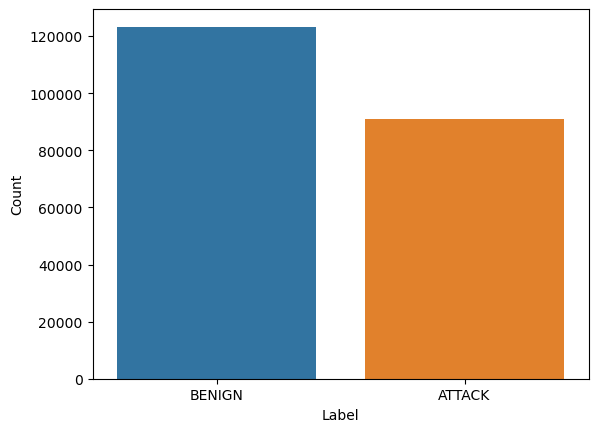

In [50]:
# Plotting the distribution of the target column
# plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=data)
# plt.title('Distribution of Target Column')
plt.xlabel('Label')
plt.ylabel('Count')
# plt.savefig('training set distribution', dpi=300)
plt.show()

## Balancing dataset using Customized sampling

In [51]:
# # Determine the number of samples you want for the minority class
# minority_size = combined_data[combined_data['Label'] == 'ATTACK'].shape[0]
# majority_size = int(minority_size * 0.95)  

In [52]:
# # Separate the majority and minority classes
# majority_data = combined_data[combined_data['Label'] == 'BENIGN']
# minority_data = combined_data[combined_data['Label'] == 'ATTACK']

In [53]:
# # Downsample the majority class
# majority_downsampled = majority_data.sample(majority_size)

In [54]:
# Combine majority and minority classes after downsampling
# balanced_data = pd.concat([majority_downsampled, minority_data])

In [55]:
# # Shuffle the dataset
# balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)

In [56]:
# plt.figure(figsize=(20, 5))
# plt.subplot(1, 2, 1)
# sns.countplot(data = balanced_data, x='Label')
# plt.title('Class Distribution')

In [57]:
#only the label column has datatype as object
for col in data.columns:
    if data[col].dtype == 'object' :
        print(f"{col}: {data[col].dtype}")

Label: object


## Encoding the 'label' column and removing infinite values 

In [58]:
# # Encoding the 'Label' column
# label_encoder = LabelEncoder()
# data['Label'] = label_encoder.fit_transform(data['Label'])

In [59]:
# Mapping benign to 0 and attack to 1:
label_mapping = {'BENIGN': 0, 'ATTACK': 1}
data['Label'] = data['Label'].map(label_mapping)

In [60]:
# Check for infinite values in the DataFrame
inf_in_cd = np.isinf(data).any()

print("Infinite values in Dataframe:", inf_in_cd.any())

Infinite values in Dataframe: True


In [61]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [62]:
data.dropna(inplace=True)

In [63]:
inf_in_cd = np.isinf(data).any()

print("Infinite values in Dataframe:", inf_in_cd.any())

Infinite values in Dataframe: False


In [64]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0


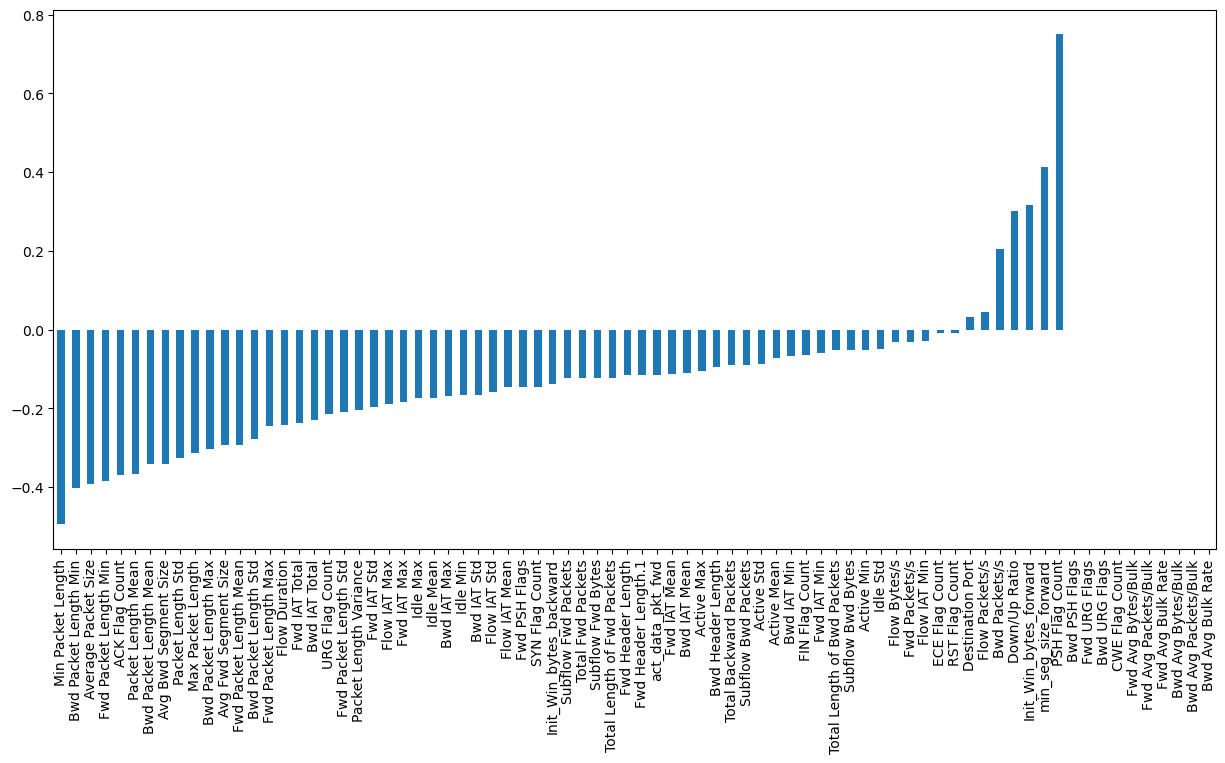

In [138]:
plt.figure(figsize=(15,7))
data.corr()['Label'][:-1].sort_values().plot(kind='bar')
# plt.savefig('data corr CICIDS.png', dpi=300)

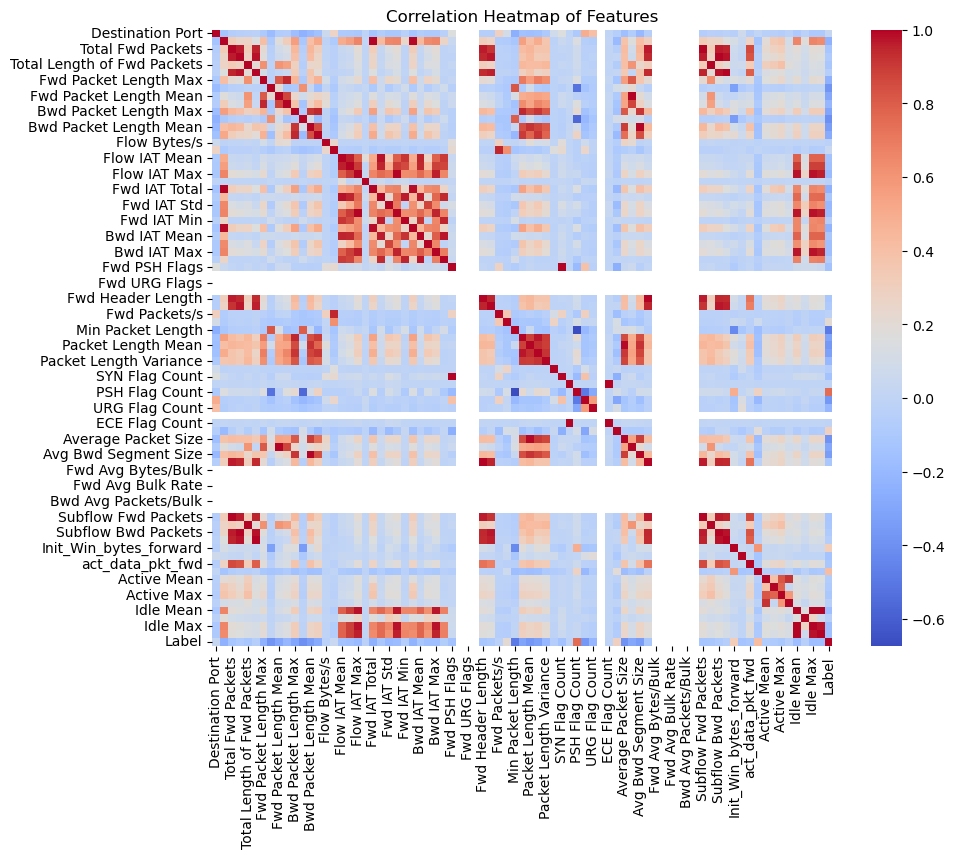

In [141]:
corr_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
# plt.savefig('correlation heatmap cicids.png', dpi=300)
plt.show()

In [66]:
X = data.drop('Label',axis=1)
y = data['Label']

In [67]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Getting feature importances
importances = clf.feature_importances_

feature_importances = pd.Series(importances, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:")
print(sorted_importances)

C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

Feature Importances:
Flow IAT Max              0.063862
Average Packet Size       0.062618
Subflow Fwd Bytes         0.062230
Fwd Packet Length Mean    0.061403
Bwd Packets/s             0.061173
                            ...   
Fwd Avg Bytes/Bulk        0.000000
SYN Flag Count            0.000000
RST Flag Count            0.000000
CWE Flag Count            0.000000
Bwd PSH Flags             0.000000
Length: 78, dtype: float64


In [68]:
# sorted_importances.to_csv('feature_importances_CICIDS copy 15 dec 3.csv')

In [69]:
# Set the importance threshold
importance_threshold = 0.015

# Get the names of features above the threshold
important_features = sorted_importances[sorted_importances > importance_threshold].index

In [70]:
# important_features

In [71]:
X = X[important_features]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


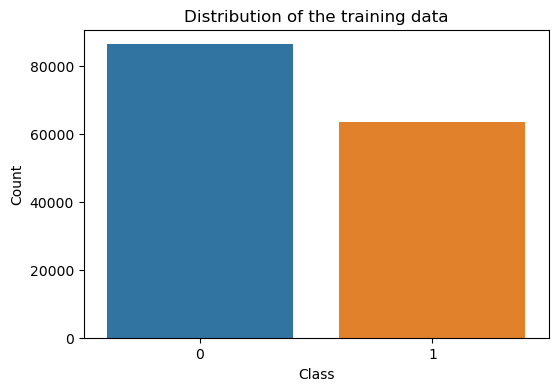

In [128]:
# Convert the DataFrame to a Series (assuming it's a single column)
y_train_series = y_train.squeeze()

# Plot a count plot using seaborn
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_series)
plt.title('Distribution of the training data')
plt.xlabel('Class')
plt.ylabel('Count')
# plt.savefig('distribution of training data CICIDS', dpi=300)
plt.show()

C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


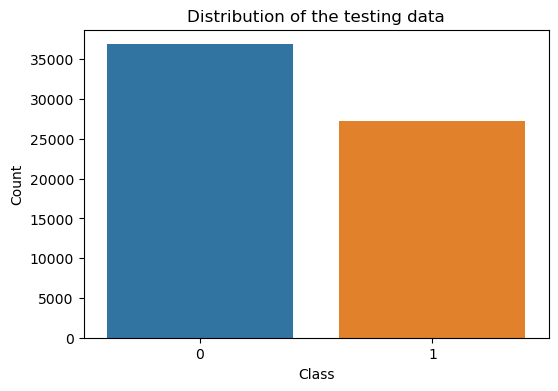

In [129]:
# Convert the DataFrame to a Series (assuming it's a single column)
y_test_series = y_test.squeeze()

# Plot a count plot using seaborn
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test_series)
plt.title('Distribution of the testing data')
plt.xlabel('Class')
plt.ylabel('Count')
# plt.savefig('distribution of testing data CICIDS', dpi=300)
plt.show()

In [73]:
X_train.shape

(149643, 22)

In [75]:
X_test.shape

(64134, 22)

In [76]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler

In [77]:
#Min max scaler
# scaler = MinMaxScaler()
# scaler = RobustScaler()
scaler = StandardScaler()

In [78]:
#fit the scaler to X_train
scaler.fit_transform(X_train)

C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

array([[-0.2347561 , -0.45787531, -0.14552279, ..., -0.14247129,
        -0.40647821, -0.1875788 ],
       [-0.23476269, -0.47153388, -0.14646746, ..., -0.14247129,
        -0.40647821, -0.18760664],
       [-0.23476075, -0.45787531, -0.14552279, ..., -0.14247129,
        -0.40647821, -0.18759845],
       ...,
       [-0.23476027, -0.47153388, -0.14646746, ..., -0.14247129,
        -0.40647821, -0.1875964 ],
       [-0.23475736, -0.47153388, -0.14646746, ..., -0.14247129,
        -0.40647821, -0.18758412],
       [ 0.75313114,  3.40738902,  0.10198009, ...,  1.05986037,
         4.1940501 ,  0.60616642]])

In [79]:
# Transform both the training and the test data
X_test = scaler.transform(X_test)

C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
logmodel = LogisticRegression(max_iter=10000)

In [82]:
logmodel.fit(X_train, y_train)

C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

LogisticRegression(max_iter=10000)

In [83]:
predictions_lr = logmodel.predict(X_test)

C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       1.00      0.23      0.38     36877
           1       0.49      1.00      0.66     27257

    accuracy                           0.56     64134
   macro avg       0.75      0.62      0.52     64134
weighted avg       0.78      0.56      0.50     64134



C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

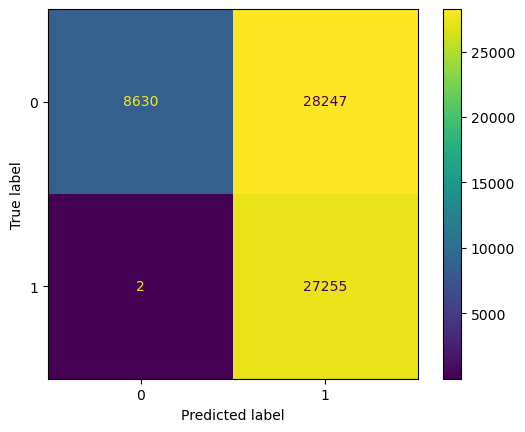

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions_lr)
# plt.savefig('CM for lr CICIDS.png',dpi=300)

C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

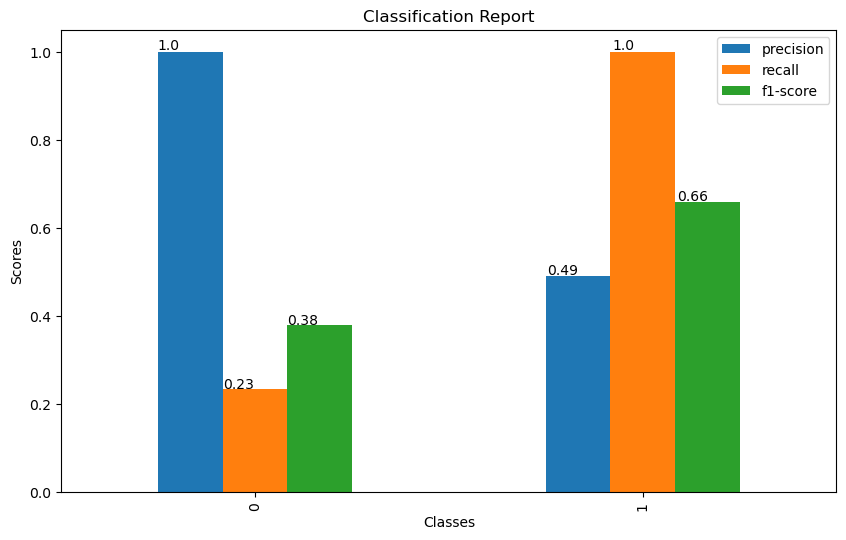

In [133]:
# Assuming y_test and predictions are defined
report = classification_report(y_test, predictions_lr, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' column if you don't want to plot it
report_df = report_df.drop('support', axis=1)

# Plotting
ax = report_df[:-3].plot(kind='bar', figsize=(10, 6))  # Exclude the last 3 rows (avg/total)
plt.title('Classification Report')
plt.xlabel('Classes')
plt.ylabel('Scores')

# Adding values on top of the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    
# plt.savefig('CR for lr CICIDS', dpi=300)

plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [93]:
# ANN
model = Sequential()

# Hidden Layers with L2 regularization
model.add(Dense(50, activation='relu')) 
model.add(Dense(25, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(5, activation='relu')) 

# Output layer for Binary Classification problem
model.add(Dense(1, activation='sigmoid'))

# Setting the learning rate
learning_rate = 0.001  # You can modify this value as needed
optimizer = Adam(learning_rate=learning_rate)

# Compiling the model with the custom learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [94]:
model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/20
4677/4677 [==============================] - 8s 2ms/step - loss: 32.2762 - accuracy: 0.6298 - val_loss: 0.5226 - val_accuracy: 0.5785
Epoch 2/20
4677/4677 [==============================] - 7s 2ms/step - loss: 1.9166 - accuracy: 0.5837 - val_loss: 0.7269 - val_accuracy: 0.5750
Epoch 3/20
4677/4677 [==============================] - 7s 2ms/step - loss: 0.5832 - accuracy: 0.5907 - val_loss: 0.8485 - val_accuracy: 0.5769
Epoch 4/20
4677/4677 [==============================] - 7s 2ms/step - loss: 0.5459 - accuracy: 0.6362 - val_loss: 0.8533 - val_accuracy: 0.5750
Epoch 5/20
4677/4677 [==============================] - 8s 2ms/step - loss: 3.8771 - accuracy: 0.5754 - val_loss: 1.2555 - val_accuracy: 0.5769
Epoch 6/20
4677/4677 [==============================] - 8s 2ms/step - loss: 4.3780 - accuracy: 0.6480 - val_loss: 0.4061 - val_accuracy: 0.5811
Epoch 7/20
4677/4677 [==============================] - 7s 2ms/step - loss: 4.9062 - accuracy: 0.5991 - val_loss: 0.4862 - val_accuracy

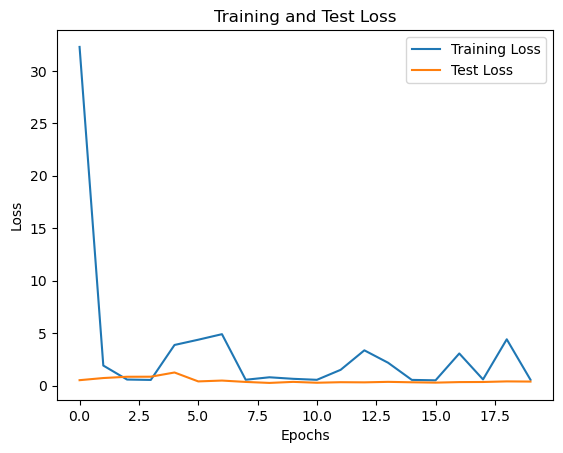

In [95]:
model_loss = pd.DataFrame(model.history.history)

training_loss = model_loss['loss']
test_loss = model_loss['val_loss']

# Plotting training and test loss
plt.plot(training_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss 15 dec.png', dpi=300)
plt.show()

In [96]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2005/2005 [==============================] - 2s 836us/step


In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     36877
           1       0.96      1.00      0.98     27257

    accuracy                           0.98     64134
   macro avg       0.98      0.98      0.98     64134
weighted avg       0.98      0.98      0.98     64134



C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

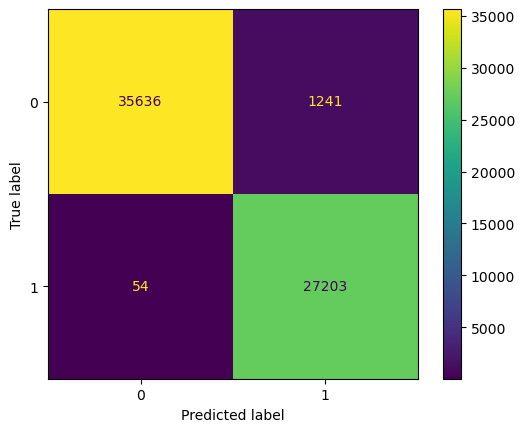

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
# plt.savefig('CM for ann cicids.png',dpi=300)

C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mdasi\anaconda3\envs\notebook\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

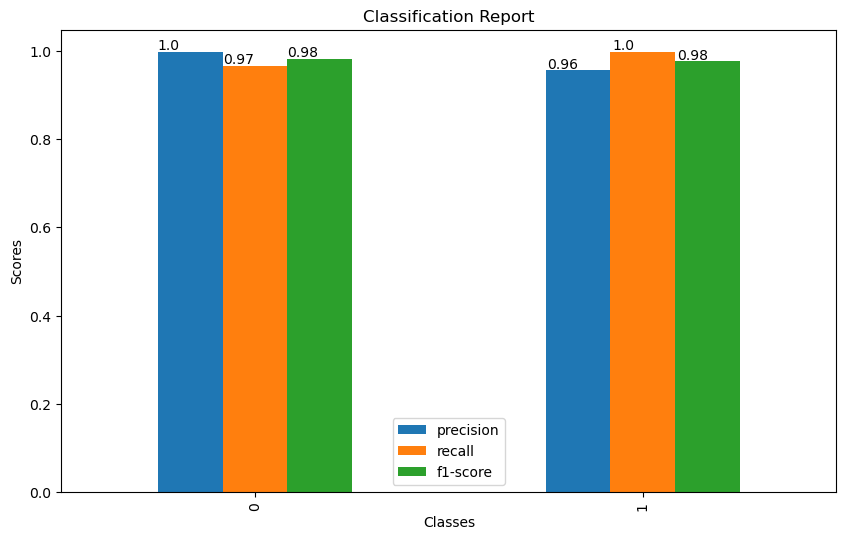

In [135]:
# Assuming y_test and predictions are defined
report = classification_report(y_test, predictions, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' column if you don't want to plot it
report_df = report_df.drop('support', axis=1)

# Plotting
ax = report_df[:-3].plot(kind='bar', figsize=(10, 6))  # Exclude the last 3 rows (avg/total)
plt.title('Classification Report')
plt.xlabel('Classes')
plt.ylabel('Scores')

# Adding values on top of the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    
# plt.savefig('CR for ann CICIDS', dpi=300)

plt.show()